<h1>Music Data Analytics Program<h1>

In [58]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

file = 'song_data.csv'
df = pd.read_csv(file)
plt.style.use('seaborn')
graph_count = 1

song_popularity = df[['song_popularity']].copy()

key = df.loc[:, 'key'].values
tempo = df.loc[:, 'tempo'].values
song_duration_ms = ((df.loc[:, 'song_duration_ms'].values)/60000)
time_signature = df.loc[:, 'time_signature'].values
audio_valence = df.loc[:, 'audio_valence'].values

tempo_slider = widgets.IntSlider(min=0, max=250, value=125, step=1)
tempo_box = widgets.HBox([widgets.Label('Tempo', layout = {'width': '110px'}), tempo_slider])

key_slider = widgets.IntSlider(min=1, max=11, value=5, step=1)
key_box = widgets.HBox([widgets.Label('Key', layout = {'width': '110px'}), key_slider])

duration_slider = widgets.FloatSlider(min=0, max=15, value=4, step=.1)
duration_box = widgets.HBox([widgets.Label('Song Duration min', layout = {'width': '110px'}), duration_slider])

signature_slider = widgets.IntSlider(min=1, max=5, value=4, step=1)
signature_box = widgets.HBox([widgets.Label('Time Signature', layout = {'width': '110px'}), signature_slider])

valence_slider = widgets.FloatSlider(min=0.0, max=1.0, value=.5, step=.1)
valence_box = widgets.HBox([widgets.Label('Audio Valence', layout = {'width': '110px'}), valence_slider])

button = widgets.Button(description='Predict Song Popularity', layout = widgets.Layout(width = '400px', height ='30px'))


def both_graphs(graph_count, x_value, y_value, x_label, y_label):
    plt.figure(figsize=(13, 6))
    plt.subplot(1,2,graph_count)
    plt.plot(x_value, y_value)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(x_label + ' vs ' + y_label , fontsize= 16)
    graph_count += 1
    
    plt.subplot(1,2,graph_count)
    plt.boxplot(x_value)
    plt.ylabel(x_label)
    plt.title(x_label + ' Box Plot', fontsize= 16)
    graph_count += 1
    plt.tight_layout(pad = 5)
    plt.show()

def convert_song_pop(df):
    df['song_popularity'].where(df['song_popularity']< 50,-1, inplace = True)
    df['song_popularity'].where(df['song_popularity']< 0,-3, inplace = True)
    df['song_popularity'].where(df['song_popularity'] != -1,'Hit', inplace = True)
    df['song_popularity'].where(df['song_popularity'] != -3,'Miss', inplace = True)
    return df

def plot_graphs(graph_count, tempo, key, song_duration_ms, time_signature, audio_valence, song_popularity):    
    both_graphs(graph_count, tempo, song_popularity, 'Tempo', 'Song Popularity')
    both_graphs(graph_count, key, song_popularity, 'Key', 'Song Popularity')
    both_graphs(graph_count, song_duration_ms, song_popularity, 'Song Duration Minutes', 'Song Popularity')
    both_graphs(graph_count, time_signature, song_popularity, 'Time Signature', 'Song Popularity')
    both_graphs(graph_count, audio_valence, song_popularity, 'Audio Valence', 'Song Popularity') 

df = convert_song_pop(df)

y=  df.values[:,1]
X = df.values[:,[2,7,12,13,14]]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.3)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

out = widgets.Output()    
def on_button_clicked(_):
      # "linking function with output"
      with out:
          # what happens when we press the button
            clear_output()
            print("The Music Data Analytics Program pridicts the song will be a " +
                 clf.predict([[(duration_slider.value * 60000), key_slider.value, tempo_slider.value,
                              signature_slider.value, valence_slider.value]]))


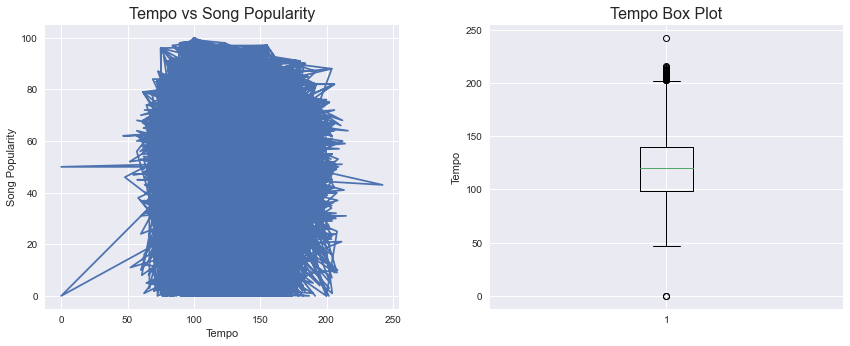

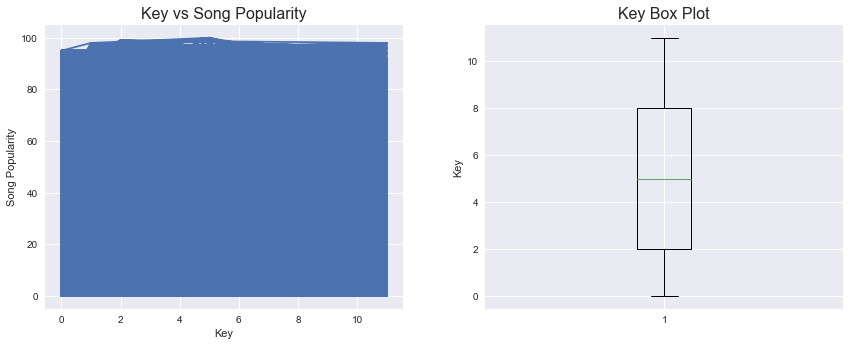

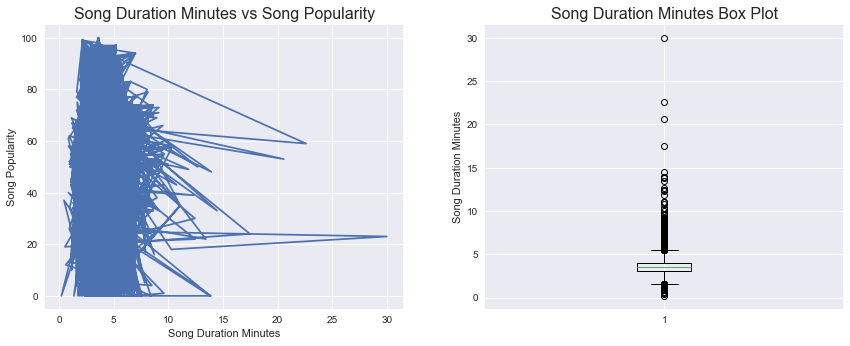

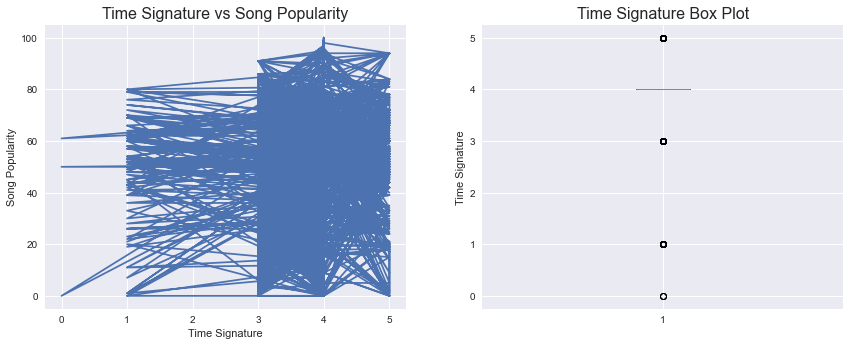

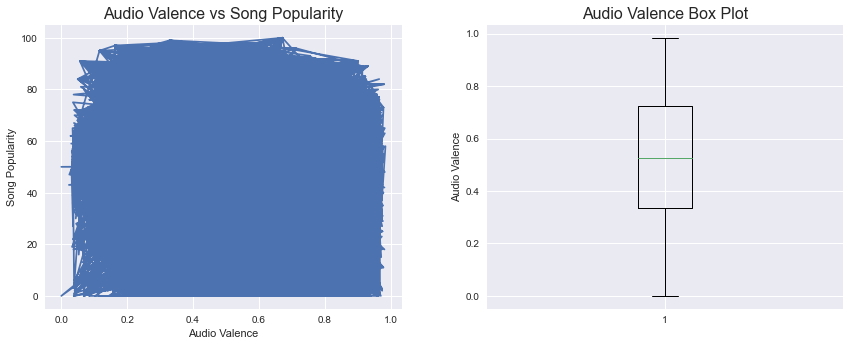

In [61]:
plot_graphs(graph_count, tempo, key, song_duration_ms, time_signature, audio_valence, song_popularity)
out = widgets.Output()
button.on_click(on_button_clicked)
display( widgets.VBox([tempo_box,key_box,duration_box,signature_box,valence_box,button,out]))
